In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
from gcs import  path_handler as ph

In [3]:
# Configure Matplotlib to use LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use 'serif' or specify the exact font family
    "font.serif": ["Times New Roman"],  # Replace with the font used in your LaTeX document
    "axes.labelsize": 12,  # Font size for axis labels
    "font.size": 12,  # General font size
    "legend.fontsize": 12,  # Font size for legend
    "xtick.labelsize": 12,  # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
})

In [4]:
results_path=ph.paths['simulations'] + "/ImpactGeometry/pouliasis2017pii-GCNBody/Pal5"+"/AllImpactGeometryByHandAndEye.csv"
results = pd.read_csv(results_path)
withgap=results[results['gap_flag']]


In [5]:
# selected_columns = ["v_rel","Mass","impact_parameter","gap_flag","T","tau"]
selected_columns = ["v_rel","Mass","impact_parameter","gap_flag",]
selected_df=results[selected_columns]
# selected_df.rename(columns={"v_rel":"Relative velocity [km/s]","Mass":"Mass [$M_{\odot}$]","impact_parameter":"Impact parameter [kpc]","gap_flag":"gap_flag",},inplace=True)
selected_df.rename(columns={"v_rel":"Relative velocity [km/s]","Mass":"Mass [$M_{\odot}$]","impact_parameter":"Impact parameter [kpc]","gap_flag":"gap_flag","T":"Time of impact [s kpc / km]","tau":r"$\tau$ [s kpc/km]"},inplace=True)
target_columns=["Relative velocity [km/s]","Mass [$M_{\odot}$]","Impact parameter [kpc]",]

axis_labels = {
    "Relative velocity [km/s]": r"$\delta v$ [km/s]",
    "Mass [$M_{\odot}$]": r"$M$ [$M_{\odot}$]",
    "Impact parameter [kpc]": r"$b$ [kpc]",
}

/tmp/ipykernel_473602/3724264420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.rename(columns={"v_rel":"Relative velocity [km/s]","Mass":"Mass [$M_{\odot}$]","impact_parameter":"Impact parameter [kpc]","gap_flag":"gap_flag","T":"Time of impact [s kpc / km]","tau":r"$\tau$ [s kpc/km]"},inplace=True)


In [6]:
gap_flag=selected_df['gap_flag']

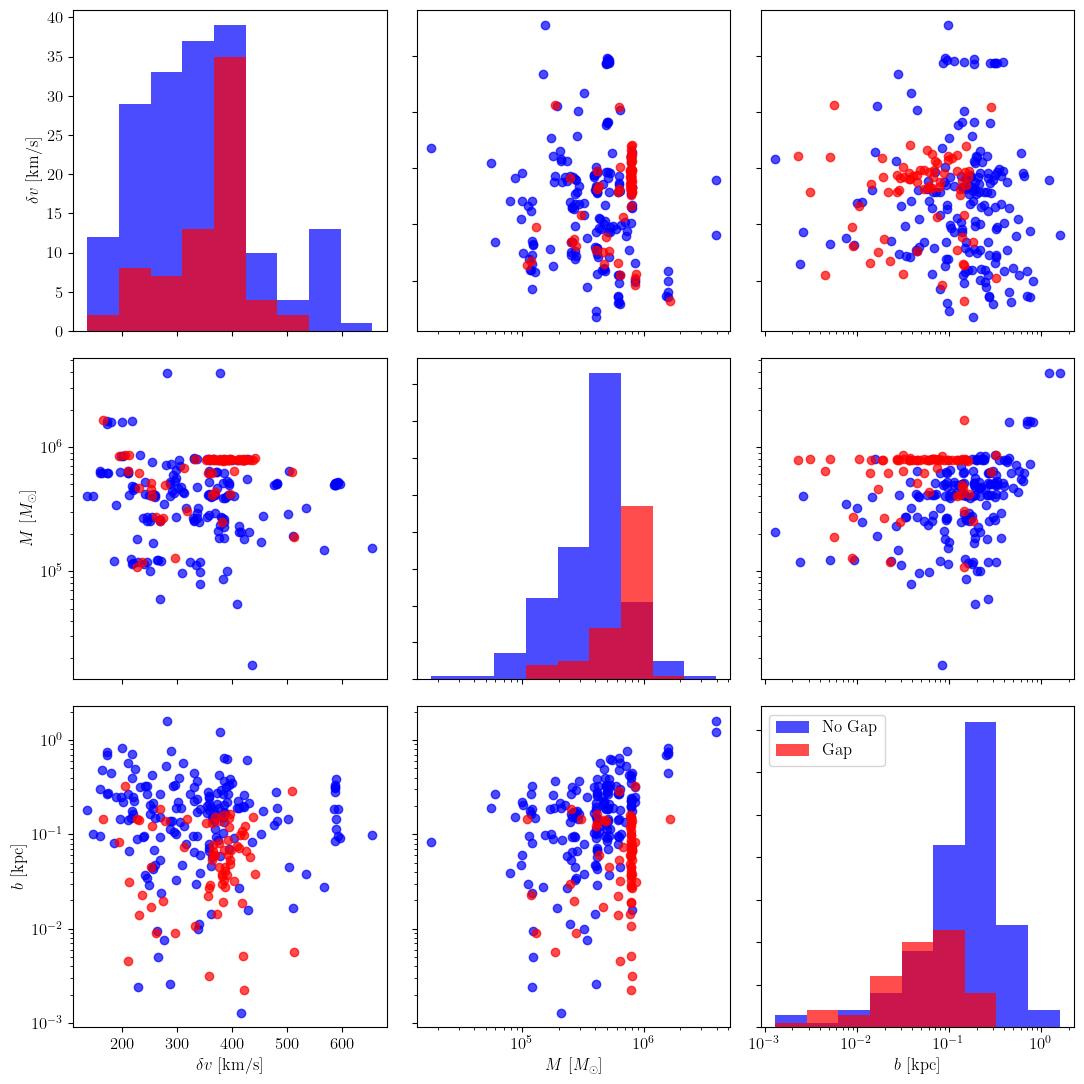

In [7]:


columns=selected_df.columns
log_columns = ['Mass [$M_{\odot}$]', 'Impact parameter [kpc]']  
n = len(columns) - 1 


# Create a figure with a gridspec layout
fig = plt.figure(figsize=(11, 11))
gs = GridSpec(n, n, figure=fig)

# Plot the pair plot
for i in range(n):
    for j in range(n):
        ax = fig.add_subplot(gs[i, j])
        
        if i == j:
            # Diagonal: Histogram with log-spaced bins if log scale
            if target_columns[i] in log_columns:
                bins = np.logspace(np.log10(selected_df[target_columns[i]].min()), np.log10(selected_df[target_columns[i]].max()), 10)
                # ax.hist(selected_df[target_columns[i]], bins=bins, color='blue', alpha=0.7)
                ax.hist(selected_df[target_columns[i]][~gap_flag], bins=bins, color='blue', alpha=0.7, label='No Gap')
                histcounts,bins,_=ax.hist(selected_df[target_columns[i]][gap_flag], bins=bins, color='red', alpha=0.7, label='Gap')
                ax.set_xscale('log')
            else:
                bins = np.linspace(selected_df[target_columns[i]].min(), selected_df[target_columns[i]].max(), 10)
                ax.hist(selected_df[target_columns[i]][~gap_flag], bins=bins, color='blue', alpha=0.7, label='No Gap')
                ax.hist(selected_df[target_columns[i]][gap_flag], bins=bins,color='red', alpha=0.7, label='Gap')
        else:
            # Off-diagonal: Scatter plot
            ax.scatter(selected_df[target_columns[j]][~gap_flag], selected_df[target_columns[i]][~gap_flag], c='blue', alpha=0.7, label='No gap')
            ax.scatter(selected_df[target_columns[j]][gap_flag], selected_df[target_columns[i]][gap_flag], c='red', alpha=0.7, label='Gap')
            if target_columns[j] in log_columns:  # Replace with your column names
                ax.set_xscale('log')
            if target_columns[i] in log_columns:  # Replace with your column names
                ax.set_yscale('log')
        
        # Set axis labels
        if i == n - 1:
            # if np.mod(j, 2) == 0:
            ax.set_xlabel(axis_labels[target_columns[j]])
        else:
            ax.set_xticklabels([])
        
        if j == 0:
            # if np.mod(i, 2) == 1:
            ax.set_ylabel(axis_labels[target_columns[i]])
        else:
            ax.set_yticklabels([])

        if np.logical_and(i == n-1, j == n-1):
            ax.legend()


fig.tight_layout()

fig.savefig("../paper/impact_geometry_statistics.png",dpi=300)

In [8]:
from astropy import constants as const  
from astropy import units as u

In [9]:
G = const.G
unitG = (u.km/u.s)**2 * u.kpc / u.Msun
G=G.to(unitG).value

In [18]:
deltaP=2*G*results["Mass"]/(results['impact_parameter']*results["v_rel"])
log10deltaP=np.log10(deltaP)

In [19]:
G*results["Mass"]/(results['impact_parameter']*results["v_rel"])

0      0.083893
1      0.317974
2      0.054486
3      0.094328
4      0.013153
         ...   
244    0.047412
245    0.200601
246    0.138903
247    0.019744
248    0.011136
Length: 249, dtype: float64

In [20]:
nbins = int(np.ceil(np.sqrt(len(deltaP))))
bins = np.logspace(np.log10(deltaP.min()), np.log10(deltaP.max()), nbins)

In [21]:
AXIS={
    "xscale": "log",
    "xlabel": r"$\Delta$ v [km/s]",
    "ylabel": r"Counts",
}

In [22]:
# Configure Matplotlib to use LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use 'serif' or specify the exact font family
    "font.serif": ["Times New Roman"],  # Replace with the font used in your LaTeX document
    "axes.labelsize": 12,  # Font size for axis labels
    "font.size": 12,  # General font size
    "legend.fontsize": 12,  # Font size for legend
    "xtick.labelsize": 12,  # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
})

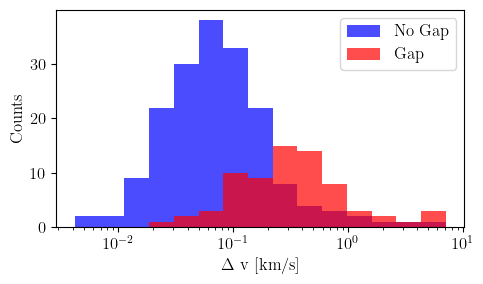

In [24]:
fig,axis=plt.subplots(figsize=(5,3))
axis.hist(deltaP[~gap_flag], bins=bins, color='blue', alpha=0.7, label='No Gap')
axis.hist(deltaP[gap_flag], bins=bins, color='red', alpha=0.7, label='Gap')
axis.legend()
axis.set(**AXIS)
fig.tight_layout()
fig.savefig("../paper/impact_geometry_statistics_deltaP.png",dpi=300)
